![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix


filename_features = "../17 - Arvores II - parte II - Árvore de Classificação/Input/UCI HAR Dataset/features.txt"
filename_labels = "../17 - Arvores II - parte II - Árvore de Classificação/Input/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "../17 - Arvores II - parte II - Árvore de Classificação/Input/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "../17 - Arvores II - parte II - Árvore de Classificação/Input/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "../17 - Arvores II - parte II - Árvore de Classificação/Input/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "../17 - Arvores II - parte II - Árvore de Classificação/Input/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "../17 - Arvores II - parte II - Árvore de Classificação/Input/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "../17 - Arvores II - parte II - Árvore de Classificação/Input/UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

/tmp/ipykernel_6722/2472268149.py:25: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
/tmp/ipykernel_6722/2472268149.py:28: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
/tmp/ipykernel_6722/2472268149.py:32: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [2]:
# análise de componentes principais para a base do HAR sem padronização:

prcomp = PCA().fit(X_train)

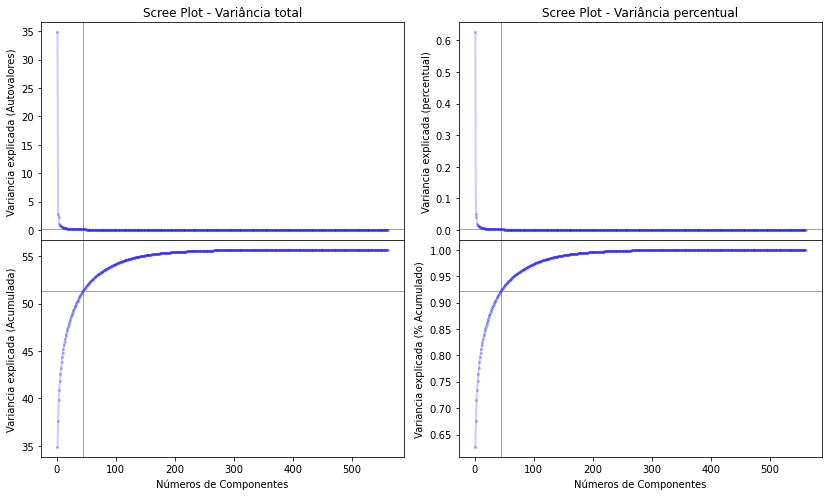

In [3]:
ncomp_autovalor_maior_1 = (prcomp.explained_variance_ratio_>1/prcomp.n_components_).sum()

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

ampli_y1 = prcomp.explained_variance_[0]

n_componentes = np.arange(prcomp.n_components_) + 1
ax[0,0].plot(n_componentes, prcomp.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

ax[1,0].plot(n_componentes, prcomp.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2,
             alpha=.2)
ax[1,0].set_xlabel('Números de Componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

ampli_y2 = prcomp.explained_variance_ratio_[0]

ax[0,1].plot(n_componentes, prcomp.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2,
             alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Números de Componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

ax[1,1].plot(n_componentes, prcomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue',
             markersize=2,alpha=.2)
ax[1,1].set_xlabel('Números de Componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')


ax[0,0].axvline(x = ncomp_autovalor_maior_1, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_autovalor_maior_1, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_autovalor_maior_1, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_autovalor_maior_1, color = 'r', linestyle = '-', linewidth=.5)


ax[0,0].axhline(y = prcomp.explained_variance_[ncomp_autovalor_maior_1-1], color = 'r', linestyle = '-',
                linewidth=.5)
ax[1,0].axhline(y = prcomp.explained_variance_.cumsum()[ncomp_autovalor_maior_1-1], color = 'r',
                linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = prcomp.explained_variance_ratio_[ncomp_autovalor_maior_1-1], color = 'r',
                linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = prcomp.explained_variance_ratio_.cumsum()[ncomp_autovalor_maior_1-1], color = 'r',
                linestyle = '-', linewidth=.5)

plt.show()

In [4]:
ncomp_autovalor_maior_1 

44

In [5]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: user 247 ms, sys: 15.3 ms, total: 263 ms
Wall time: 265 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


In [6]:
# análise de componentes principais para a base do HAR com padronização:


prcomp_pad = PCA().fit(X_train_pad)


In [7]:
prcomp_pad.n_components_

561

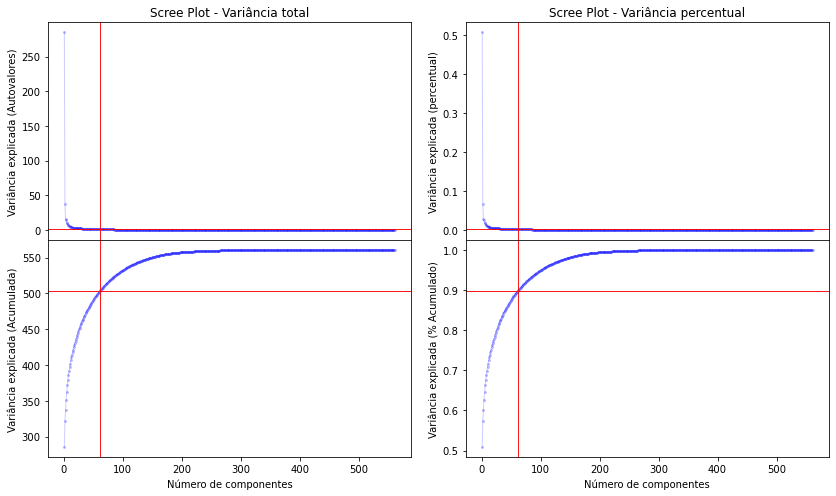

In [38]:
ncomp_autovalor1_pad = (prcomp_pad.explained_variance_ratio_>1/prcomp_pad.n_components_).sum()

fig, ax = plt.subplots(2,2, sharex = True, figsize = (14, 8))
plt.subplots_adjust(hspace = 0, wspace=.15)

n_componentes = np.arange(prcomp_pad.n_components_)+1
ax[0,0].plot(n_componentes, prcomp_pad.explained_variance_, 'o-', linewidth=1, color='blue', markersize = 2, 
            alpha =.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variância explicada (Autovalores)')
ax[1,0].plot(n_componentes, prcomp_pad.explained_variance_.cumsum(), '-o', linewidth=1, color='blue', 
            markersize=2,alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variância explicada (Acumulada)')
ax[0,1].plot(n_componentes, prcomp_pad.explained_variance_ratio_, '-o', linewidth=1,color='blue', markersize=2,
            alpha = .2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Númenro de componentes')
ax[0,1].set_ylabel('Variância explicada (percentual)')
ax[1,1].plot(n_componentes, prcomp_pad.explained_variance_ratio_.cumsum(), '-o', color= 'blue', linewidth=1,
            markersize=2, alpha = .2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variância explicada (% Acumulado)')

ax[0,0].axvline(x= ncomp_autovalor1_pad, color='red', linestyle='-', linewidth=.9)
ax[1,0].axvline(x= ncomp_autovalor1_pad, color='red', linestyle='-', linewidth=.9)
ax[0,1].axvline(x= ncomp_autovalor1_pad, color='red', linestyle='-', linewidth=.9)
ax[1,1].axvline(x= ncomp_autovalor1_pad, color='red', linestyle='-', linewidth=.9)

ax[0,0].axhline(y = prcomp_pad.explained_variance_[ncomp_autovalor1_pad - 1], color='red', linestyle='-',
               linewidth = .9)
ax[1,0].axhline(y = prcomp_pad.explained_variance_.cumsum()[ncomp_autovalor1_pad - 1], color='red', linestyle='-',
               linewidth = .9)
ax[0,1].axhline(y = prcomp_pad.explained_variance_ratio_[ncomp_autovalor1_pad - 1], color='red', linestyle='-',
               linewidth = .9)
ax[1,1].axhline(y = prcomp_pad.explained_variance_ratio_.cumsum()[ncomp_autovalor1_pad - 1], color='red', linestyle='-',
               linewidth = .9)

plt.show()

In [55]:
ncomp_autovalor1_pad 

61

In [ ]:
# quantos componentes você escolheria, em cada caso para explicar 90% da variância. 

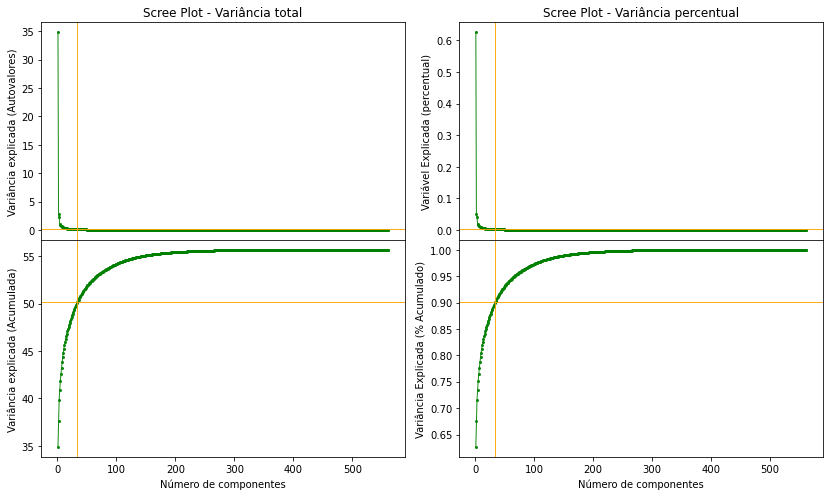

In [50]:
# 90% da Variância Explicada - na base sem padronização

fig, ax = plt.subplots(2,2, sharex=True, figsize=(14,8))
plt.subplots_adjust(hspace=0, wspace=.15)

varexplicada = .9
ncomp_crierio3 = (prcomp.explained_variance_ratio_.cumsum()<varexplicada).sum()+1

n_componentes = np.arange(prcomp.n_components_)+1
ax[0,0].plot(n_componentes, prcomp.explained_variance_, '-o', linewidth=1, color='green', markersize=2, 
             alpha=.9 )
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variância explicada (Autovalores)')
ax[1,0].plot(n_componentes, prcomp.explained_variance_.cumsum(), '-o', linewidth=1, color='green', 
            markersize=2, alpha=.9)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variância explicada (Acumulada)')
ax[0,1].plot(n_componentes, prcomp.explained_variance_ratio_, '-o', linewidth=1, color='green', 
            markersize=2, alpha=.9)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variável Explicada (percentual)')
ax[1,1].plot(n_componentes, prcomp.explained_variance_ratio_.cumsum(), '-o', linewidth=1, color = 'green',
            markersize=2, alpha=.9)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variância Explicada (% Acumulado)')

ax[0,0].axvline(x=ncomp_crierio3, color='orange', linestyle='-', linewidth = .9)
ax[1,0].axvline(x=ncomp_crierio3, color='orange', linestyle='-', linewidth = .9)
ax[0,1].axvline(x=ncomp_crierio3, color='orange', linestyle='-', linewidth = .9)
ax[1,1].axvline(x=ncomp_crierio3, color='orange', linestyle='-', linewidth = .9)

ax[0,0].axhline(y=prcomp.explained_variance_[ncomp_crierio3-1], color='orange', linestyle='-', linewidth = .9)
ax[1,0].axhline(y=prcomp.explained_variance_.cumsum()[ncomp_crierio3-1], color='orange', linestyle='-',
                linewidth = .9)
ax[0,1].axhline(y=prcomp.explained_variance_ratio_[ncomp_crierio3-1], color='orange', linestyle='-', linewidth = .9)
ax[1,1].axhline(y=prcomp.explained_variance_ratio_.cumsum()[ncomp_crierio3-1], color='orange', linestyle='-',
                linewidth = .9)

plt.show()

In [28]:
ncomp_crierio3 # na base sem padronizar 34 componentes explicaria 90% da variância

34

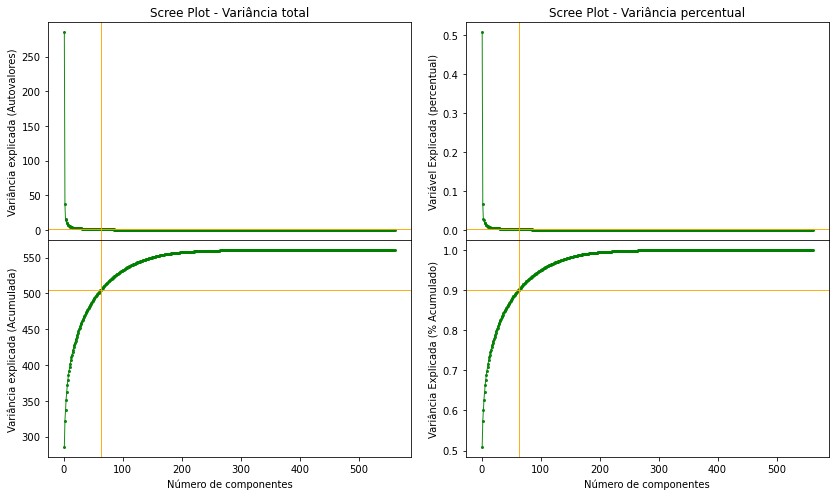

In [51]:
# 90% da Variância Explicada - na base com padronização

fig, ax = plt.subplots(2,2, sharex=True, figsize=(14,8))
plt.subplots_adjust(hspace=0, wspace=.15)

varexplicada = .9
ncomp_crierio3 = (prcomp_pad.explained_variance_ratio_.cumsum()<varexplicada).sum()+1

n_componentes = np.arange(prcomp.n_components_)+1
ax[0,0].plot(n_componentes, prcomp_pad.explained_variance_, '-o', linewidth=1, color='green', markersize=2, 
             alpha=.9 )
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variância explicada (Autovalores)')
ax[1,0].plot(n_componentes, prcomp_pad.explained_variance_.cumsum(), '-o', linewidth=1, color='green', 
            markersize=2, alpha=.9)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variância explicada (Acumulada)')
ax[0,1].plot(n_componentes, prcomp_pad.explained_variance_ratio_, '-o', linewidth=1, color='green', 
            markersize=2, alpha=.9)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variável Explicada (percentual)')
ax[1,1].plot(n_componentes, prcomp_pad.explained_variance_ratio_.cumsum(), '-o', linewidth=1, color = 'green',
            markersize=2, alpha=.9)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variância Explicada (% Acumulado)')

ax[0,0].axvline(x=ncomp_crierio3, color='orange', linestyle='-', linewidth = .9)
ax[1,0].axvline(x=ncomp_crierio3, color='orange', linestyle='-', linewidth = .9)
ax[0,1].axvline(x=ncomp_crierio3, color='orange', linestyle='-', linewidth = .9)
ax[1,1].axvline(x=ncomp_crierio3, color='orange', linestyle='-', linewidth = .9)

ax[0,0].axhline(y=prcomp_pad.explained_variance_[ncomp_crierio3-1], color='orange', linestyle='-', linewidth = .9)
ax[1,0].axhline(y=prcomp_pad.explained_variance_.cumsum()[ncomp_crierio3-1], color='orange', linestyle='-',
                linewidth = .9)
ax[0,1].axhline(y=prcomp_pad.explained_variance_ratio_[ncomp_crierio3-1], color='orange', linestyle='-', linewidth = .9)
ax[1,1].axhline(y=prcomp_pad.explained_variance_ratio_.cumsum()[ncomp_crierio3-1], color='orange', linestyle='-',
                linewidth = .9)

plt.show()

In [52]:
ncomp_crierio3 # na base com padronização 63 componentes explicaria 90% da variância

63

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [53]:
%%time
# análise de componentes principais com 10 componentes ou variáveis na base original

prcomp10 = PCA(n_components=10).fit(X_train)
pc_train = prcomp10.transform(X_train)
pc_test = prcomp10.transform(X_test)
print(pc_train.shape)

clf_pca10 = DecisionTreeClassifier(random_state = 2360873 ,ccp_alpha=0.001).fit(pc_train, y_train)

(7352, 10)
CPU times: user 559 ms, sys: 64.2 ms, total: 624 ms
Wall time: 420 ms


A acurácia na base de treino é 0.8924102285092492


/opt/anaconda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


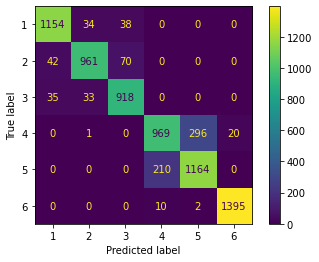

In [54]:
# cálculo da acurácia na base de treino - Base de dados sem padronização
ŷ_train = clf_pca10.predict(pc_train)
print(f'A acurácia na base de treino é {accuracy_score(y_train, ŷ_train)}')
plot_confusion_matrix(clf_pca10, pc_train, y_train)

A acurácia na base de teste é 0.8242280285035629


/opt/anaconda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


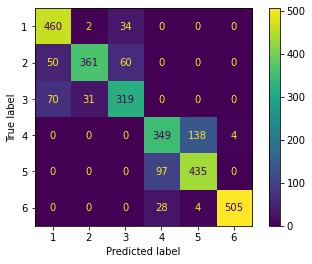

In [55]:
# cálculo da acurácia na base de teste - Base de dados sem padronização
ŷ_test = clf_pca10.predict(pc_test)
print(f'A acurácia na base de teste é {accuracy_score(y_test, ŷ_test)}')
plot_confusion_matrix(clf_pca10, pc_test, y_test)

In [56]:
%%time
# análise de componentes principais com 10 componentes ou variáveis na base padronizada

prcomp_pad10 = PCA(n_components=10).fit(X_train_pad)
pc_train = prcomp_pad10.transform(X_train_pad)
print(pc_train.shape)

clf_pca_pad10 = DecisionTreeClassifier(random_state = 2360873 ,ccp_alpha=0.001).fit(pc_train, y_train)

(7352, 10)
CPU times: user 567 ms, sys: 12.2 ms, total: 579 ms
Wall time: 343 ms


A acurácia na base de treino é 0.8593579978237215


/opt/anaconda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


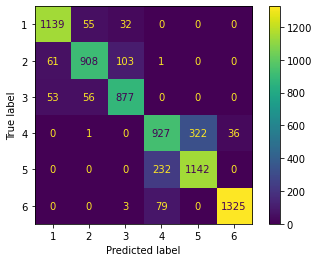

In [57]:
# cálculo da acurácia na base de treino - Base de dados com padronização
ŷ_train = clf_pca_pad10.predict(pc_train)
print(f'A acurácia na base de treino é {accuracy_score(y_train, ŷ_train)}')
plot_confusion_matrix(clf_pca_pad10, pc_train, y_train)

A acurácia na base de teste é 0.7750254496097726


/opt/anaconda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


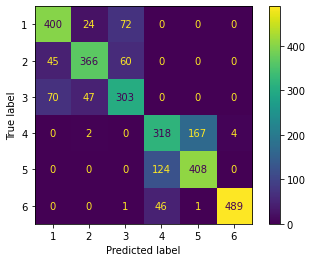

In [58]:
# cálculo da acurácia na base de test - Base de dados com padronização


X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)

pc_test = prcomp_pad10.transform(X_test_pad)

ŷ_test = clf_pca_pad10.predict(pc_test)
print(f'A acurácia na base de teste é {accuracy_score(y_test, ŷ_test)}')
plot_confusion_matrix(clf_pca_pad10, pc_test, y_test)

Comparação: Note-se que a acurácia da base sem padronização foi melhor (acurácia na base de treino de 0,89% e na base de teste de 0,82%) em relação à acurácia da base com padronização (acurácia na base de treino de 0,86% e na base de teste 0,77%).